<a href="https://colab.research.google.com/github/ayesharasheed1326/CurrencyConverter/blob/main/cats_vs_dogs_classifiaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:12<00:00, 101MB/s]
100% 1.06G/1.06G [00:12<00:00, 91.7MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [17]:
#ccn model->will pass the data in it
#will create an architecture such that it will have 3 layers -32,62,128 filters
model=Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 83ms/step - accuracy: 0.5672 - loss: 2.5780 - val_accuracy: 0.6742 - val_loss: 0.5995
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.6890 - loss: 0.6006 - val_accuracy: 0.6564 - val_loss: 0.6301
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.7495 - loss: 0.5174 - val_accuracy: 0.7754 - val_loss: 0.4764
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.7986 - loss: 0.4448 - val_accuracy: 0.7730 - val_loss: 0.5369
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.8304 - loss: 0.3879 - val_accuracy: 0.6126 - val_loss: 1.0444
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.8508 - loss: 0.3471 - val_accuracy: 0.8030 - val_loss: 0.4603
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.9003 - loss: 0.2427 - val_accuracy: 0.8006 - val_loss: 0.5401
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.9332 - loss: 0.1713 - 

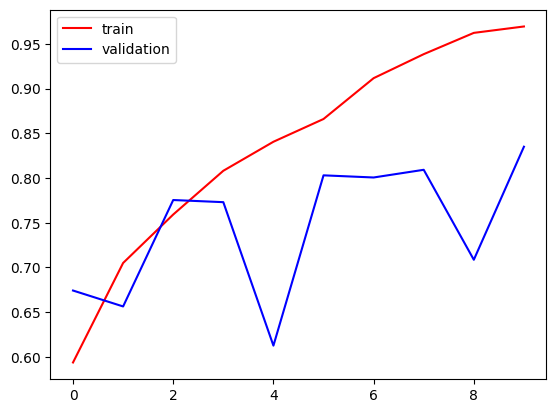

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

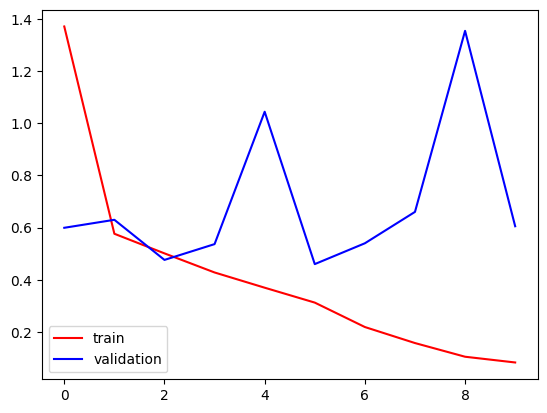

In [22]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting
#add more data
#data Augumnetation
#l1/l2 regularition
#droupout
#batch norm
#Reduce complexity


In [23]:
import cv2


In [52]:
test_img= cv2.imread('/content/dog.jpeg')

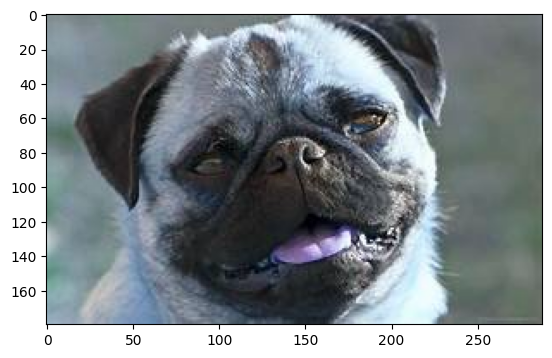

In [53]:
plt.imshow(test_img)

In [54]:
test_img.shape


(180, 288, 3)

In [55]:
test_img=cv2.resize(test_img,(256,256))

In [56]:
test_input=test_img.reshape((1,256,256,3))

In [57]:
test_input = test_input / 255.0

In [67]:

# Make the prediction
prediction = model.predict(test_input)

# Print the prediction probability
print(f"Prediction Probability: {prediction[0][0]}")

# Convert the probability into a class label
if prediction[0][0] > 0.5:
    print("Dog")
else:
    print("Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction Probability: 0.9922670722007751
Dog


In [59]:
test_img1= cv2.imread('/content/cat.jpeg')


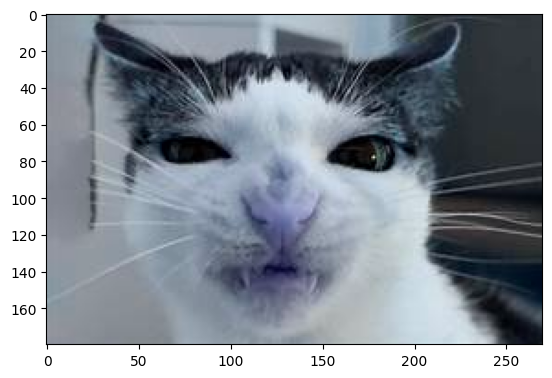

In [60]:
plt.imshow(test_img1)

In [61]:
test_img.shape

(256, 256, 3)

In [62]:
test_img1.shape

(180, 270, 3)

In [63]:
test_img1=cv2.resize(test_img1,(256,256))

In [64]:
test_input1=test_img1.reshape((1,256,256,3))

In [65]:
test_input1 = test_input1 / 255.0  # if your model was trained on normalized data


In [66]:
# Make the prediction
prediction = model.predict(test_input1)

# Print the prediction probability
print(f"Prediction Probability: {prediction[0][0]}")

# Convert the probability into a class label
if prediction[0][0] > 0.5:
    print("Dog")
else:
    print("Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction Probability: 0.00033215174335055053
Cat
